In [68]:
import os
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime as datetime
import warnings; 
import pandas as pd
import numpy as np
import pystan
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Entrega Trabajo final 3er corte Andres Perez 

In [2]:
link='https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD'

In [3]:
covid=pd.read_csv(link)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
covid.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


# descriptivos


In [5]:
covid_bogota=covid[covid['Nombre municipio']=='BOGOTA']

In [6]:
covid_bogota.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
7,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
8,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
9,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
10,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [85]:
numeric_data = covid.select_dtypes(include=[np.number])
categorical_data = covid.select_dtypes(exclude=[np.number])

In [88]:
numeric_data.describe()

,ID de caso,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Edad,Unidad de medida de edad,Código ISO del país,Pertenencia étnica
count,5.055253e+06,5.055253e+06,5.055253e+06,5.055253e+06,5.055253e+06,3143.000000,5.040665e+06
mean,2.527667e+06,1.345545e+03,2.831293e+04,3.950593e+01,1.003612e+00,594.374801,5.905402e+00
std,1.459326e+06,5.988937e+03,2.612073e+04,1.797564e+01,6.522722e-02,287.664267,6.095319e-01
min,1.000000e+00,5.000000e+00,5.001000e+03,1.000000e+00,1.000000e+00,4.000000,1.000000e+00
25%,1.263854e+06,1.100000e+01,1.100100e+04,2.600000e+01,1.000000e+00,380.000000,6.000000e+00
50%,2.527667e+06,1.700000e+01,1.100100e+04,3.700000e+01,1.000000e+00,724.000000,6.000000e+00
75%,3.791480e+06,6.800000e+01,5.000600e+04,5.200000e+01,1.000000e+00,840.000000,6.000000e+00
max,5.055293e+06,4.700100e+04,9.977300e+04,1.140000e+02,3.000000e+00,1724.000000,6.000000e+00


In [89]:
categorical_data.head()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Nombre del grupo étnico
0,6/3/2020 0:00:00,2/3/2020 0:00:00,BOGOTA,BOGOTA,F,Importado,Casa,Leve,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,NaN
1,9/3/2020 0:00:00,6/3/2020 0:00:00,VALLE,BUGA,M,Importado,Casa,Leve,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,NaN
2,9/3/2020 0:00:00,7/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,F,Importado,Casa,Leve,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,NaN
3,11/3/2020 0:00:00,9/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,M,Relacionado,Casa,Leve,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,NaN
4,11/3/2020 0:00:00,9/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,M,Relacionado,Casa,Leve,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,NaN


In [90]:
categorical_data['Estado'].value_counts()

Leve         4889657
Fallecido     128236
leve           14744
Moderado        1387
Grave            386
LEVE               2
Name: Estado, dtype: int64

In [91]:
categorical_data['Nombre del grupo étnico'].value_counts()

Por definir                  17140
Sin Comunidad                 7974
ZENU                          7831
PIJAO                         3539
PASTO                         2565
                             ...  
VEREDA EL CARMEN - ASATAV        1
LA FLORESTA JAIDE                1
NASA UH                          1
POLUMOU                          1
GUAYABERO                        1
Name: Nombre del grupo étnico, Length: 1753, dtype: int64

In [93]:
categorical_data['Nombre departamento'].value_counts()

BOGOTA             1461086
ANTIOQUIA           766704
VALLE               415384
CUNDINAMARCA        265974
SANTANDER           229543
BARRANQUILLA        215149
CARTAGENA           126061
ATLANTICO           122587
TOLIMA              108031
BOYACA              106289
CORDOBA             104499
CALDAS              101145
NORTE SANTANDER      97658
CESAR                91432
NARIÑO               90287
META                 90062
HUILA                88839
RISARALDA            88354
STA MARTA D.E.       70338
SUCRE                59626
QUINDIO              57805
CAUCA                56677
GUAJIRA              45334
CASANARE             35865
BOLIVAR              34015
MAGDALENA            28986
CAQUETA              22980
PUTUMAYO             16885
CHOCO                16488
ARAUCA               13952
SAN ANDRES            7930
AMAZONAS              6888
GUAVIARE              5155
VICHADA               2992
GUAINIA               2457
VAUPES                1794
Tolima                   1
C

In [95]:
categorical_data['Recuperado'].value_counts()

Recuperado    4895931
Fallecido      127941
Activo          13615
fallecido         295
Name: Recuperado, dtype: int64

# Conteo de casos por fecha

In [7]:
covid_bogota=covid_bogota['fecha reporte web'].value_counts()

In [8]:
#covid_bogota.info()

AttributeError: ignored

In [9]:
covid_bogota=pd.DataFrame({'fecha reporte web':covid_bogota.index, 'conteo':covid_bogota.values})

In [10]:
covid_bogota

,fecha reporte web,conteo
0,24/6/2021 0:00:00,15569
1,17/6/2021 0:00:00,12493
2,19/6/2021 0:00:00,11729
3,1/7/2021 0:00:00,11545
4,30/6/2021 0:00:00,11493
...,...,...
620,22/3/2020 0:00:00,4
621,12/3/2020 0:00:00,2
622,11/3/2020 0:00:00,2
623,13/3/2020 0:00:00,1


In [20]:
df=covid_bogota

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha reporte web  625 non-null    datetime64[ns]
 1   conteo             625 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.9 KB


In [70]:
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])# convierte el series a dataframe

In [71]:
df=df.sort_values(by='fecha reporte web')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 585 to 465
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha reporte web  625 non-null    datetime64[ns]
 1   conteo             625 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.6 KB


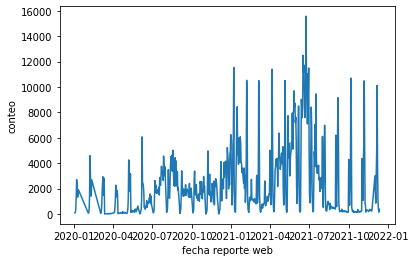

In [73]:
sns.lineplot(data=df,y='conteo',x='fecha reporte web')

In [74]:
df_1= np.array(df['conteo'].values)
generator = TimeseriesGenerator(df_1,df_1,length=4,batch_size=12)

In [75]:
model =  tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

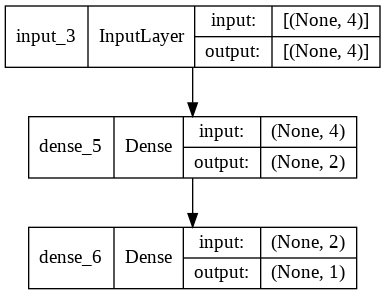

In [76]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [77]:
model.compile(loss='mse',optimizer='adam')

In [78]:
model.fit_generator(generator,epochs=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/300
52/52 [==============================] - 0s 2ms/step - loss: 4018284.0000
Epoch 2/300
52/52 [==============================] - 0s 2ms/step - loss: 3575257.7500
Epoch 3/300
52/52 [==============================] - 0s 2ms/step - loss: 3452861.5000
Epoch 4/300
52/52 [==============================] - 0s 2ms/step - loss: 3409787.5000
Epoch 5/300
52/52 [==============================] - 0s 2ms/step - loss: 3399772.2500
Epoch 6/300
52/52 [==============================] - 0s 2ms/step - loss: 3380696.0000
Epoch 7/300
52/52 [==============================] - 0s 2ms/step - loss: 3370098.5000
Epoch 8/300
52/52 [==============================] - 0s 2ms/step - loss: 3356236.0000
Epoch 9/300
52/52 [==============================] - 0s 2ms/step - loss: 3347631.0000
Epoch 10/300
52/52 [==============================] - 0s 2ms/step - loss: 3338930.0000
Epoch 11/300
52/52 [==============================] - 0s 2ms/step - loss: 3328663.7500
Epoch 12/300
52/52 [==============================] 

In [79]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
y_pred = model.predict_generator(generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



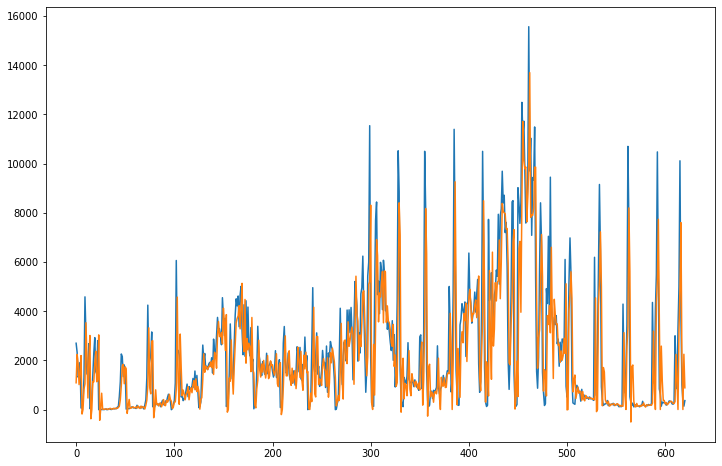

In [81]:

plt.figure(figsize=(12,8))

plt.plot(df_1[4:])

plt.plot(y_pred)

In [82]:
# 

# intento de prediccion de modelo con prophet


In [83]:
pip install Prophet

In [56]:
from prophet import Prophet

In [57]:
df.columns

Index(['fecha reporte web', 'conteo'], dtype='object')

In [59]:
df.rename(columns={'fecha reporte web':'sd','conteo':'y'})

,sd,y
585,2020-01-04,81
551,2020-01-05,147
457,2020-01-06,383
331,2020-01-07,1398
194,2020-01-08,2701
...,...,...
137,2021-12-07,3781
377,2021-12-08,1020
467,2021-12-09,361
554,2021-12-10,143


In [84]:
model.fit(df)

ValueError: ignored